# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Gaudino, Andrea (346119);
2. Grivet Talocia, Lorenzo (346559).


In [1]:
StudentID1 = 346119
StudentID2 = 346559

## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)


ModuleNotFoundError: No module named 'numpy'

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [46]:
# DO NOT IMPORT NUMPY
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

%matplotlib widget

RuntimeError: 'widget is not a recognised GUI loop or backend name

## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

From the file 'responses_hw.csv' we extracted 2/3 of the original data and then we removed all the rows that contained null values. We decided to delete them instead of replacing null values with arbitrary ones, in order to avoid 'non-neutral' entries that can create misleading results in the clustering task.

In the following cell after the pre-processing operations we display the first 5 rows of the dataset that we'll use during our homework.

In [4]:
df_responses = pd.read_csv("responses_hw.csv")

df_tot = df_responses.loc[:,these_features+labels]
df_tot = df_tot.sample(n=int(np.round(len(df_tot)*2/3)), random_state=random_seed)
df_tot=df_tot.dropna()

#Dataset with all the features
X_df=df_tot.loc[:,these_features]

#Dataset with just the labels
X_labels=df_tot.loc[:,labels]


display(X_df.head(5)) #printing first five entries 


,Appearence and gestures,Loss of interest,Prioritising workload,Workaholism,Daily events,Assertiveness,New environment,Writing notes,Getting angry,Funniness,...,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
581,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,1.0,3.0,...,3.0,4.0,4.0,5.0,3.0,2.0,5.0,2.0,5.0,1.0
754,2.0,1.0,2.0,2.0,3.0,3.0,5.0,2.0,2.0,4.0,...,2.0,3.0,4.0,3.0,3.0,3.0,2.0,4.0,3.0,3.0
184,3.0,3.0,1.0,3.0,2.0,1.0,3.0,3.0,2.0,5.0,...,1.0,2.0,1.0,1.0,4.0,5.0,5.0,1.0,1.0,2.0
903,3.0,2.0,5.0,4.0,5.0,4.0,5.0,4.0,3.0,4.0,...,5.0,4.0,2.0,3.0,5.0,4.0,4.0,3.0,1.0,1.0
155,2.0,5.0,5.0,5.0,4.0,4.0,1.0,5.0,1.0,1.0,...,2.0,3.0,3.0,2.0,4.0,3.0,4.0,2.0,2.0,3.0


Here we display the information about our dataset.

In [5]:
print(X_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 581 to 194
Data columns (total 99 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Appearence and gestures     469 non-null    float64
 1   Loss of interest            469 non-null    float64
 2   Prioritising workload       469 non-null    float64
 3   Workaholism                 469 non-null    float64
 4   Daily events                469 non-null    float64
 5   Assertiveness               469 non-null    float64
 6   New environment             469 non-null    float64
 7   Writing notes               469 non-null    float64
 8   Getting angry               469 non-null    float64
 9   Funniness                   469 non-null    float64
 10  Number of friends           469 non-null    int64  
 11  God                         469 non-null    float64
 12  Elections                   469 non-null    float64
 13  Mood swings                 469 non-nu

In the following three cells, we transformed all categorical values into numerical ones to perform the application of the algorithms we plan to use.

To maintain the consistency with the rest of the dataset, we used numerical values ranging from 1 to 5. This approach was suitable because the categorical values were already ordered, making sure that we did not introduce an unnecessary or arbitrary ordering.

In [6]:
#map smoking
map_smoking={
    'never smoked':1,
    'tried smoking':2,
    'former smoker':3,
    'current smoker':4
}

X_df["Smoking"]=X_df["Smoking"].map(map_smoking)


In [7]:
#map internet usage
map_internetusage={
    'less than an hour a day':1,
    'few hours a day':2,
    'most of the day':3
}
X_df["Internet usage"]=X_df["Internet usage"].map(map_internetusage)

In [8]:
#map alcohol
map_alcohol={
    'never':1,
    'social drinker':2,
    'drink a lot':3
}
X_df["Alcohol"]=X_df["Alcohol"].map(map_alcohol)

## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

In [9]:
#standard scaler
std_scaler = StandardScaler()
std_scaler.fit(X_df)
Xstd_df = std_scaler.transform(X_df)

In [10]:
#min-max scaler
mm_scaler= MinMaxScaler()
mm_scaler.fit(X_df)
Xmm_df=mm_scaler.transform(X_df)

In the next cell we display the variance of all the features present in all the datasets (X_df, Xstd_df, Xmm_df).

In [11]:
variance_df = pd.DataFrame(np.var(X_df,axis=0), columns = ['Original'])
variance_df['Standard scaler'] = np.var(Xstd_df,axis=0)
variance_df['Min-Max scaler'] = np.var(Xmm_df,axis=0)

display(variance_df)

,Original,Standard scaler,Min-Max scaler
Appearence and gestures,0.903524,1.0,0.056470
Loss of interest,1.804138,1.0,0.112759
Prioritising workload,1.474843,1.0,0.092178
Workaholism,1.677925,1.0,0.104870
Daily events,1.262433,1.0,0.078902
...,...,...,...
Rock n roll,1.481935,1.0,0.092621
Alternative,1.705048,1.0,0.106565
Latino,1.765949,1.0,0.110372
"Techno, Trance",1.749219,1.0,0.109326


The variances in the original dataset are small and similar to each other, this is due to the data distribution, in fact all the values in the dataset are between 1 and 5.

In the dataset transformed by the standard scaler, all variances are equal to 1. This results from the scaling algorithm, which standardizes the data by rescaling the values to achieve a variance of 1 and a mean of 0 for each feature.

Finally, the min-max scaler recomputes all the values between 0 and 1, so the variances are significantly lower than the original ones.

In [12]:
#PCA on all the components
pca_xdf = PCA(n_components=X_df.shape[1])
pca_xstd_df = PCA(n_components=Xstd_df.shape[1])
pca_xmm_df = PCA(n_components=Xmm_df.shape[1])


#Fit of the data for each dataset
pca_xdf.fit(X_df)
pca_xstd_df.fit(Xstd_df)
pca_xmm_df.fit(Xmm_df)

PCA(n_components=99)

We performed all the Principal Components Analysis for each dataset, so here we display the curves of the cumulative explained variances.

Text(0, 0.5, 'Cumulative explained variance ratio')

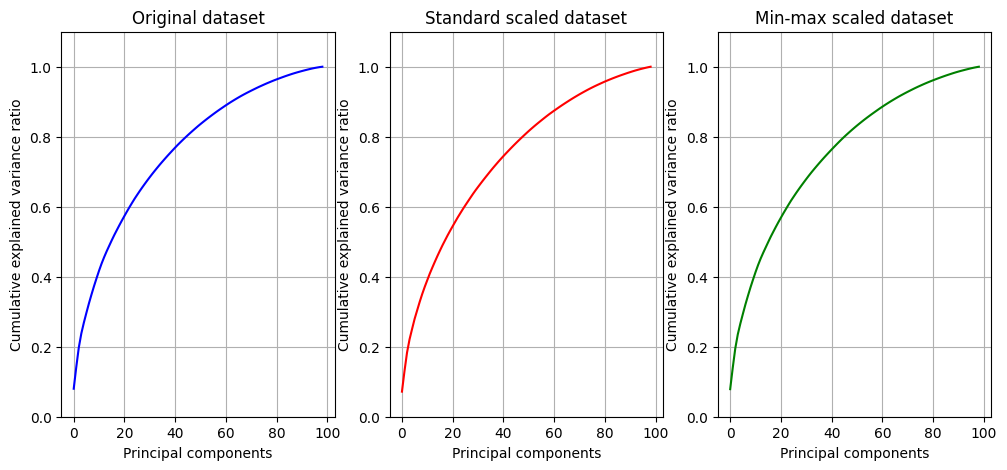

In [13]:

fig, ax = plt.subplots(1,3, figsize = (12, 5))

ax[0].plot(np.cumsum(pca_xdf.explained_variance_ratio_), c = 'blue')
ax[0].grid()
ax[0].set_title('Original dataset')
ax[0].set_ylim([0, 1.1])
ax[0].set_xlabel('Principal components')
ax[0].set_ylabel('Cumulative explained variance ratio')

ax[1].plot(np.cumsum(pca_xstd_df.explained_variance_ratio_), c = 'red')
ax[1].grid()
ax[1].set_title('Standard scaled dataset')
ax[1].set_ylim([0, 1.1])
ax[1].set_xlabel('Principal components')
ax[1].set_ylabel('Cumulative explained variance ratio')


ax[2].plot(np.cumsum(pca_xmm_df.explained_variance_ratio_), c = 'green')
ax[2].grid()
ax[2].set_title('Min-max scaled dataset')
ax[2].set_ylim([0, 1.1])
ax[2].set_xlabel('Principal components')
ax[2].set_ylabel('Cumulative explained variance ratio')



The three plots are very similar to each other so, to make it clear that there are actually some differeces between them we decide to plot all three together in the next cell.

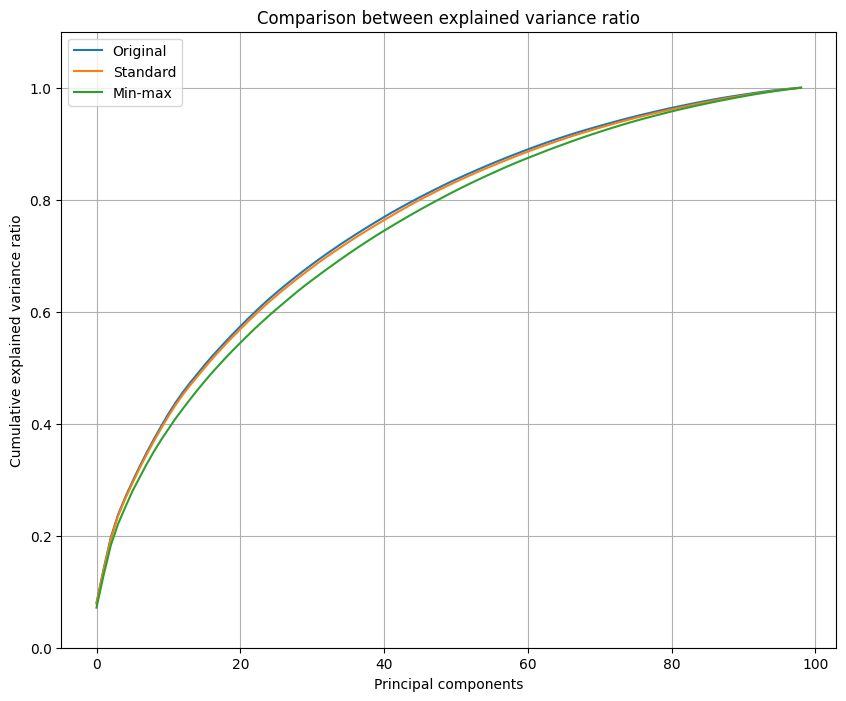

In [14]:
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca_xdf.explained_variance_ratio_))
plt.plot(np.cumsum(pca_xmm_df.explained_variance_ratio_))
plt.plot(np.cumsum(pca_xstd_df.explained_variance_ratio_))
plt.ylim([0, 1.1])
plt.title('Comparison between explained variance ratio')
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance ratio')
plt.legend(['Original', 'Standard', 'Min-max'])
plt.grid()

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

In [15]:
def number_of_components(pca):
    cum_variance = np.cumsum(pca.explained_variance_ratio_)
    i = 0
    while cum_variance[i] < 0.33:
        i += 1

    return min(5, i+1)  

In [16]:
m_std = number_of_components(pca_xstd_df)
m_mm = number_of_components(pca_xmm_df)


For both datasets the number of principal components that gives the 33% of total variance is above 5, therefore we selected only the first 5 PC's.

In the cell below we create a PCA object for each dataset and then we fit them with their respective data.

In [17]:
pca_std_m=PCA(n_components=m_std)
pca_mm_m=PCA(n_components=m_mm)

pca_std_m.fit(Xstd_df)
pca_mm_m.fit(Xmm_df)

PCA(n_components=5)

Here we define the colors for each type from the list 'these_types' to better visualize the features in the next plot graph.

In [18]:
color_set = cm.Set3.colors
key_colors = {key: color_set[i] for i,key in enumerate(these_types)}


rows = []
for i in variables_by_type.keys():
    for j in variables_by_type[i]:
        if j in these_features:
            rows.append([i, j, key_colors[i]])

df_type_colors = pd.DataFrame(rows, columns=['type', 'feature', 'color'])



In the next cell we plot, for each PC, the contribution of every feature colored by type. 

We decided to set a threshold (eps) in order to take into account, for the interpretation of the PC, only the most significant features.

In [19]:

eps = (1/pca_std_m.n_features_in_)**(1/2)*1.2

colors_type = df_type_colors['color']

type_colors_legend = [Line2D([0], [0], color=key_colors[k], label = k) for k in key_colors.keys()]


def plot_pcs(df, pca,m):

    for ii in range(m):
        plt.figure(figsize=(12,6))
        plt.bar(df.columns,pca.components_[ii] , color = [df_type_colors[df_type_colors["feature"]==c]["color"].values[0] for c in df.columns])
        plt.plot([-0.5, pca.n_features_in_ - 0.5], [eps, eps], 'red')
        plt.plot([-0.5, pca.n_features_in_ - 0.5], [-eps, -eps], 'red')
        plt.legend(handles = type_colors_legend, title="Types")
        plt.xticks(rotation = 90,fontsize=5)
        plt.show()
        
                
        pos = []
        neg = []
        for i in range(len(pca.components_[ii])):
            if np.abs(pca.components_[ii][i]) > eps:
                if pca.components_[ii][i] > 0:
                    pos.append(df.columns[i])
                else:
                    neg.append(df.columns[i])
        
        print('')
        print(f'****************** PC{ii+1} **********************')
        print(f'HIGH-VALUED POSITIVE COMPONENTS:') 
        for i in pos:
            print(i, end='; ')
        print('\n')
        print(f'HIGH-VALUED NEGATIVE COMPONENTS:')  
        for i in neg:
            print(i, end='; ')
        print()
        print('*********************************************')
        print('')
        
        



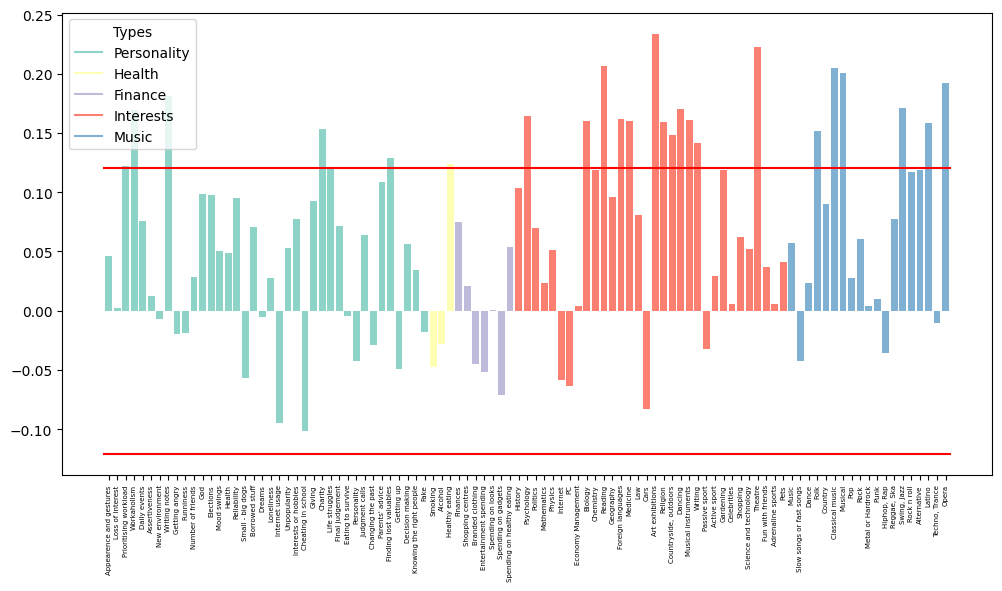


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS:
Prioritising workload; Workaholism; Writing notes; Charity; Finding lost valuables; Healthy eating; Psychology; Biology; Reading; Foreign languages; Medicine; Art exhibitions; Religion; Countryside, outdoors; Dancing; Musical instruments; Writing; Theatre; Folk; Classical music; Musical; Swing, Jazz; Latino; Opera; 

HIGH-VALUED NEGATIVE COMPONENTS:

*********************************************



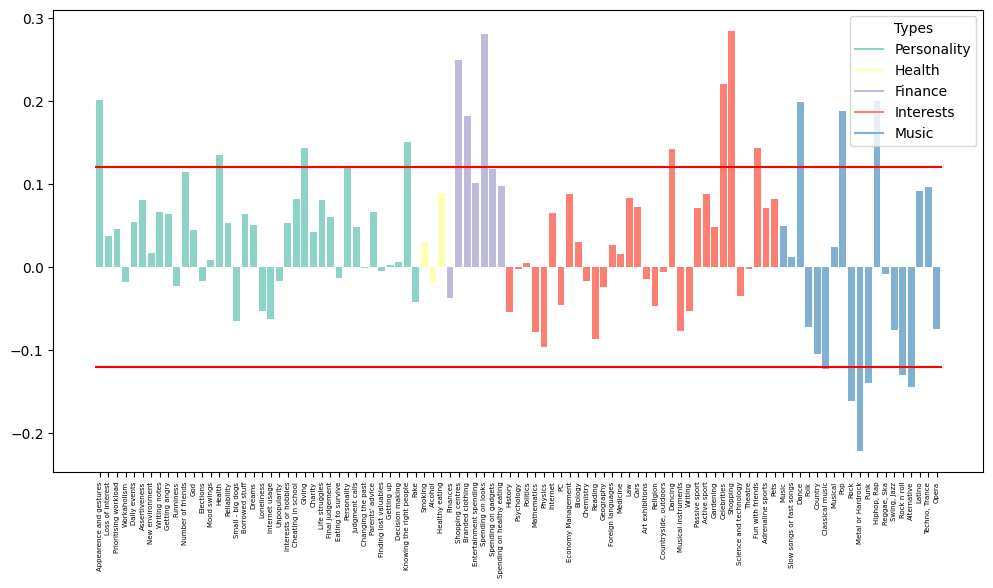


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS:
Appearence and gestures; Health; Giving; Personality; Knowing the right people; Shopping centres; Branded clothing; Spending on looks; Dancing; Celebrities; Shopping; Fun with friends; Dance; Pop; Hiphop, Rap; 

HIGH-VALUED NEGATIVE COMPONENTS:
Classical music; Rock; Metal or Hardrock; Punk; Rock n roll; Alternative; 
*********************************************



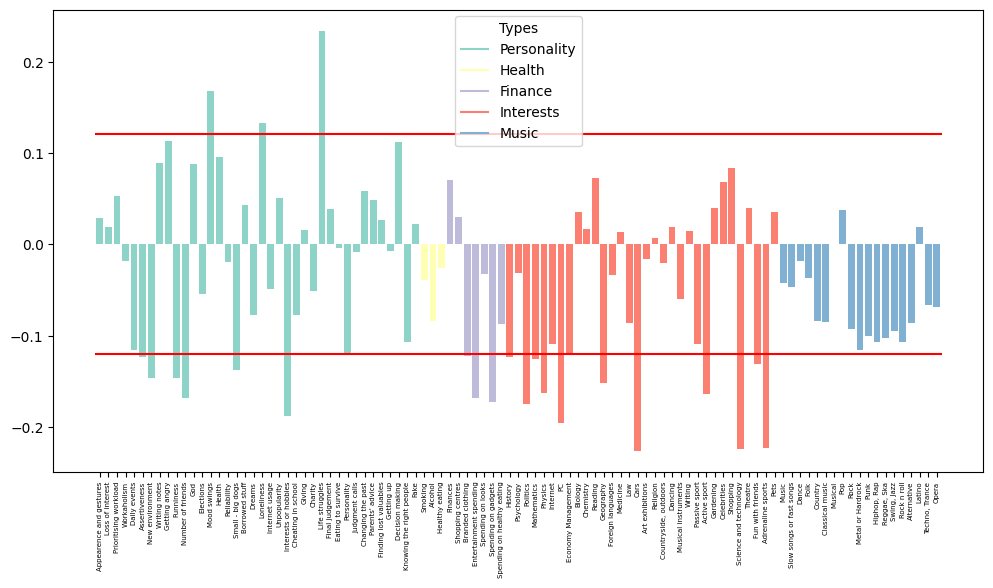


****************** PC3 **********************
HIGH-VALUED POSITIVE COMPONENTS:
Mood swings; Loneliness; Life struggles; 

HIGH-VALUED NEGATIVE COMPONENTS:
Assertiveness; New environment; Funniness; Number of friends; Small - big dogs; Interests or hobbies; Branded clothing; Entertainment spending; Spending on gadgets; History; Politics; Mathematics; Physics; PC; Geography; Cars; Active sport; Science and technology; Fun with friends; Adrenaline sports; 
*********************************************



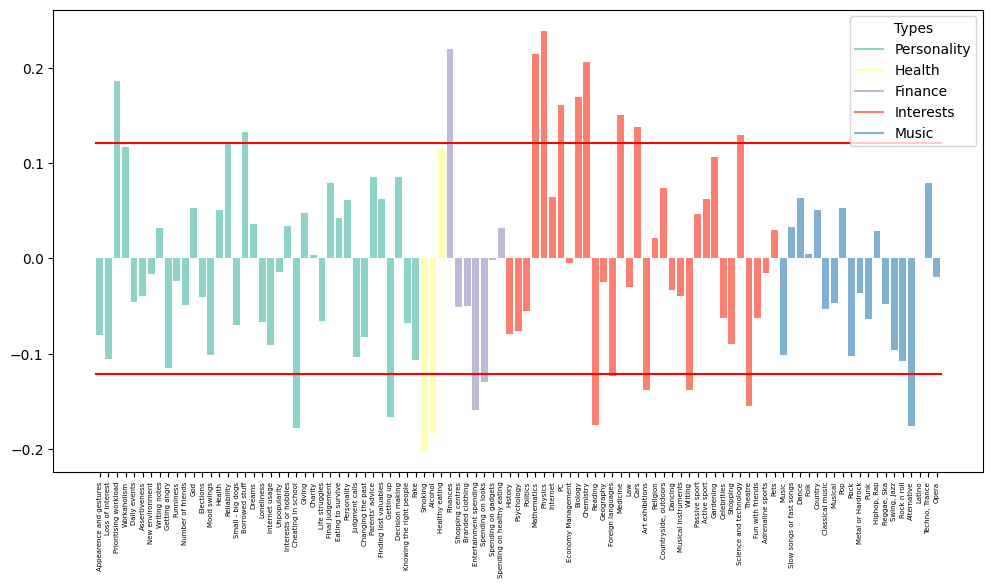


****************** PC4 **********************
HIGH-VALUED POSITIVE COMPONENTS:
Prioritising workload; Reliability; Borrowed stuff; Finances; Mathematics; Physics; PC; Biology; Chemistry; Medicine; Cars; Science and technology; 

HIGH-VALUED NEGATIVE COMPONENTS:
Cheating in school; Getting up; Smoking; Alcohol; Entertainment spending; Spending on looks; Reading; Foreign languages; Art exhibitions; Writing; Theatre; Alternative; 
*********************************************



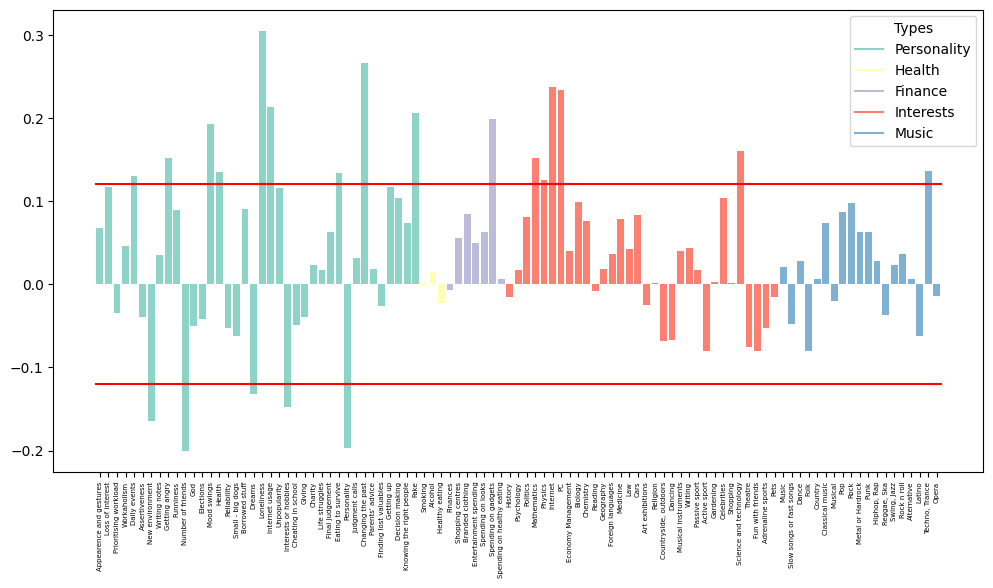


****************** PC5 **********************
HIGH-VALUED POSITIVE COMPONENTS:
Daily events; Getting angry; Mood swings; Health; Loneliness; Internet usage; Eating to survive; Changing the past; Fake; Spending on gadgets; Mathematics; Physics; Internet; PC; Science and technology; Techno, Trance; 

HIGH-VALUED NEGATIVE COMPONENTS:
New environment; Number of friends; Dreams; Interests or hobbies; Personality; 
*********************************************



In [20]:
plot_pcs(X_df,pca_std_m,m_std)

Standard scaler dataset

PC1: lazy, unmotivated

PC2: alternative, out of the box

PC3: fun-lover, outgoing 

PC4: unreliable, rebel

PC5: tech enthusiast, introvert

In [21]:
names_pc_std=["lazy, unmotivated", "alternative, out of the box", "fun-lover, outgoing", "unreliable, rebel", "tech enthusiast, introvert"]


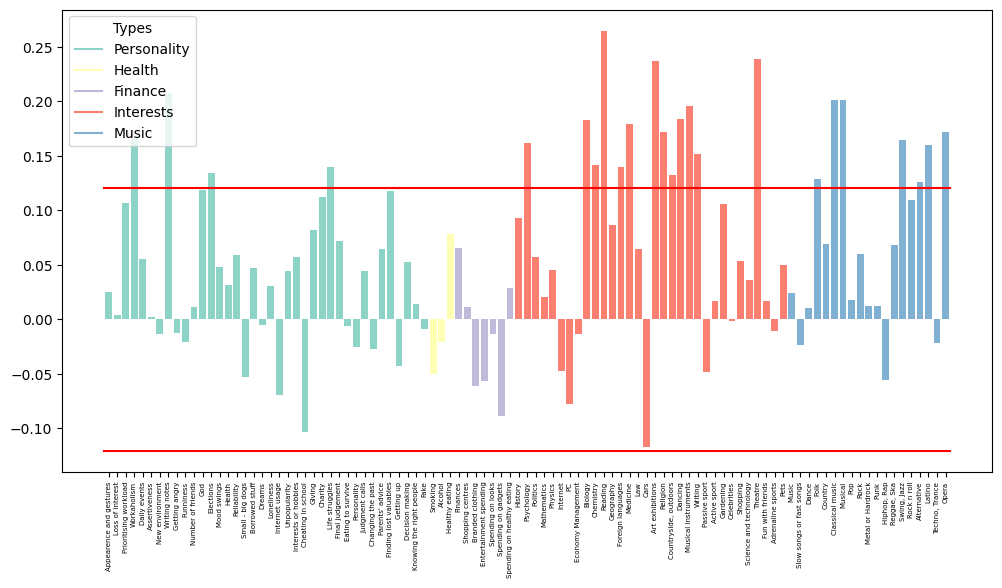


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS:
Workaholism; Writing notes; Elections; Life struggles; Psychology; Biology; Chemistry; Reading; Foreign languages; Medicine; Art exhibitions; Religion; Countryside, outdoors; Dancing; Musical instruments; Writing; Theatre; Folk; Classical music; Musical; Swing, Jazz; Alternative; Latino; Opera; 

HIGH-VALUED NEGATIVE COMPONENTS:

*********************************************



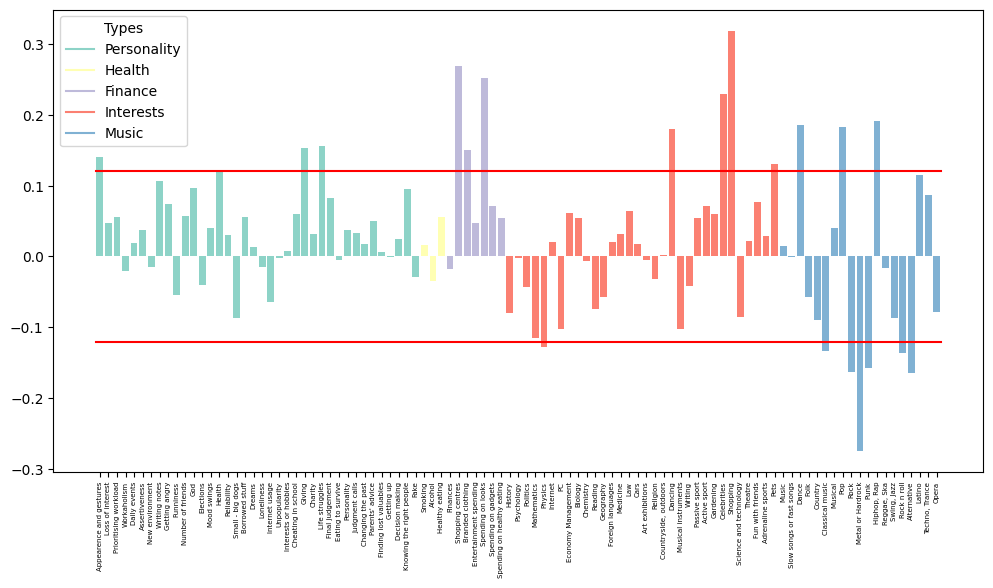


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS:
Appearence and gestures; Giving; Life struggles; Shopping centres; Branded clothing; Spending on looks; Dancing; Celebrities; Shopping; Pets; Dance; Pop; Hiphop, Rap; 

HIGH-VALUED NEGATIVE COMPONENTS:
Physics; Classical music; Rock; Metal or Hardrock; Punk; Rock n roll; Alternative; 
*********************************************



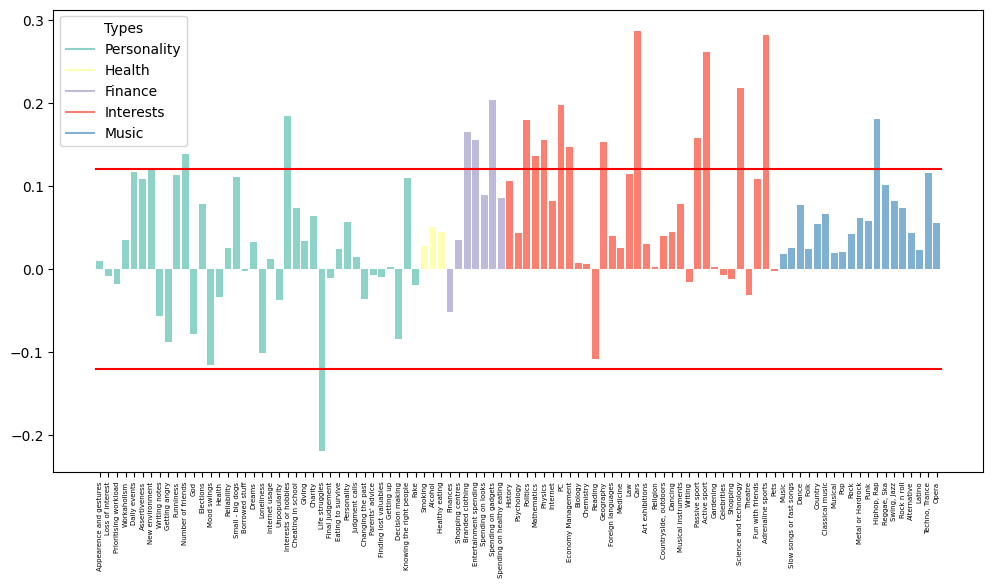


****************** PC3 **********************
HIGH-VALUED POSITIVE COMPONENTS:
Number of friends; Interests or hobbies; Branded clothing; Entertainment spending; Spending on gadgets; Politics; Mathematics; Physics; PC; Economy Management; Geography; Cars; Passive sport; Active sport; Science and technology; Adrenaline sports; Hiphop, Rap; 

HIGH-VALUED NEGATIVE COMPONENTS:
Life struggles; 
*********************************************



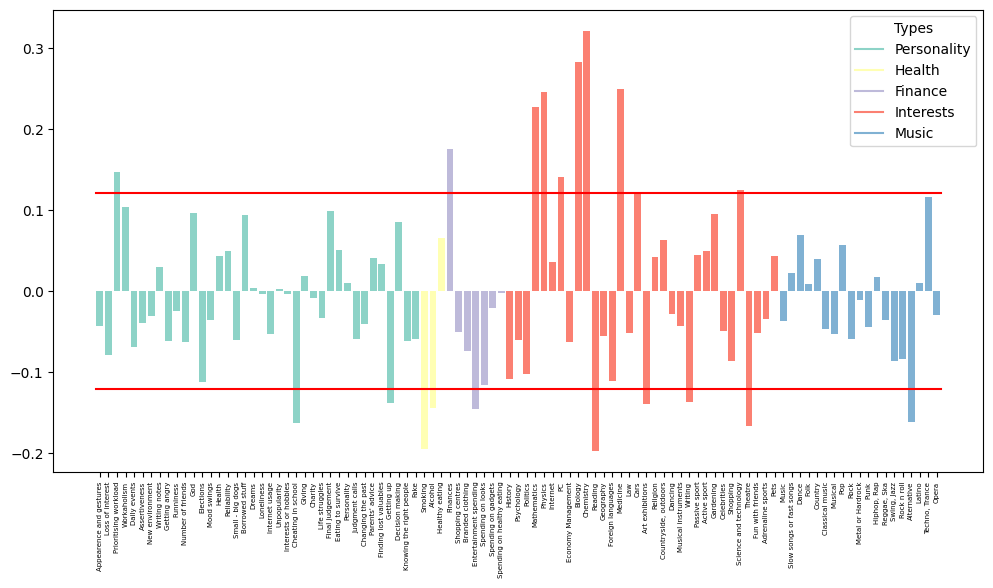


****************** PC4 **********************
HIGH-VALUED POSITIVE COMPONENTS:
Prioritising workload; Finances; Mathematics; Physics; PC; Biology; Chemistry; Medicine; Cars; Science and technology; 

HIGH-VALUED NEGATIVE COMPONENTS:
Cheating in school; Getting up; Smoking; Alcohol; Entertainment spending; Reading; Art exhibitions; Writing; Theatre; Alternative; 
*********************************************



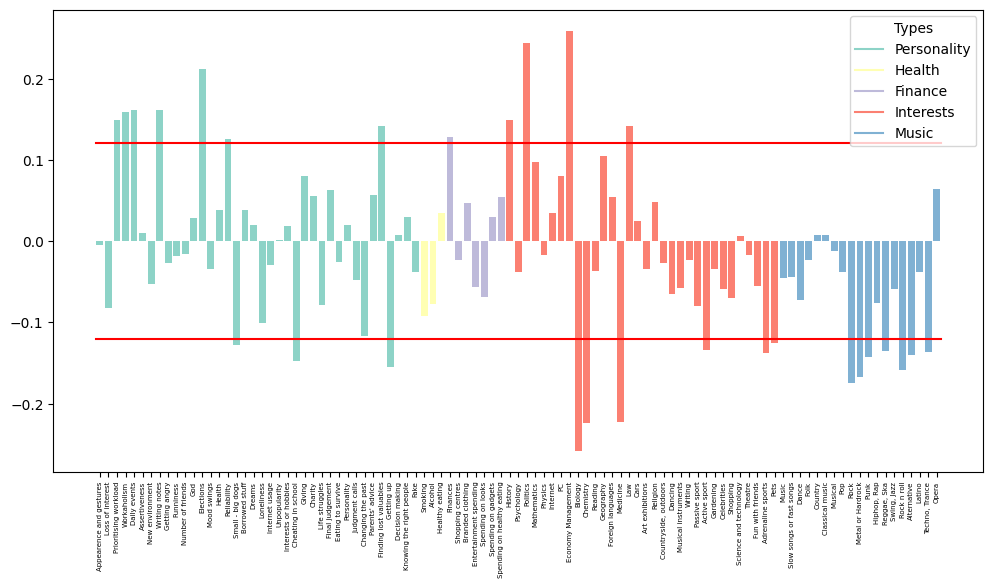


****************** PC5 **********************
HIGH-VALUED POSITIVE COMPONENTS:
Prioritising workload; Workaholism; Daily events; Writing notes; Elections; Reliability; Finding lost valuables; Finances; History; Politics; Economy Management; Law; 

HIGH-VALUED NEGATIVE COMPONENTS:
Small - big dogs; Cheating in school; Getting up; Biology; Chemistry; Medicine; Active sport; Adrenaline sports; Pets; Rock; Metal or Hardrock; Punk; Reggae, Ska; Rock n roll; Alternative; Techno, Trance; 
*********************************************



In [22]:
plot_pcs(X_df,pca_mm_m,m_mm)

PC1: cultured, creative

PC2: music lover, careless about appearence

PC3: outgoing, fun-lover

PC4: practical, hard worker

PC5: disciplined, political enthusiast

In [23]:
names_pc_mm=[ "cultured, creative",

"music lover, careless about appearence",

"outgoing, fun-lover",

"practical, hard worker",

"disciplined, political enthusiast"]

Here we transform the data in the PC space.

In [24]:
Ystd_df = pca_std_m.transform(Xstd_df)
Ymm_df = pca_mm_m.transform(Xmm_df)


In the following cell we plot the score graph for both datasets, as we have 5 PC's we only use 3 of them in order to have a graph of 3 dimensions. The principal components selected are shown in the plot as the name of the axes.

In [25]:
def score_graph(df,names, title):
    sg_3d = plt.figure(figsize=(6,6))
    ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
    ax_sg_3d.scatter(df[:,0],df[:,1],df[:,2], s=2)
    plt.title(title)
    ax_sg_3d.set_xlabel(names[0])
    ax_sg_3d.set_ylabel(names[1])
    ax_sg_3d.set_zlabel(names[2])
    plt.grid()
    plt.show()

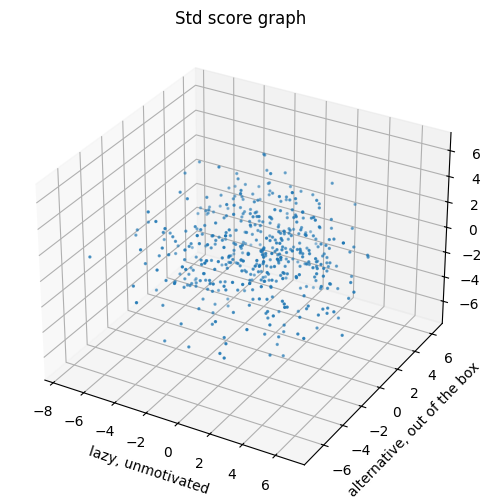

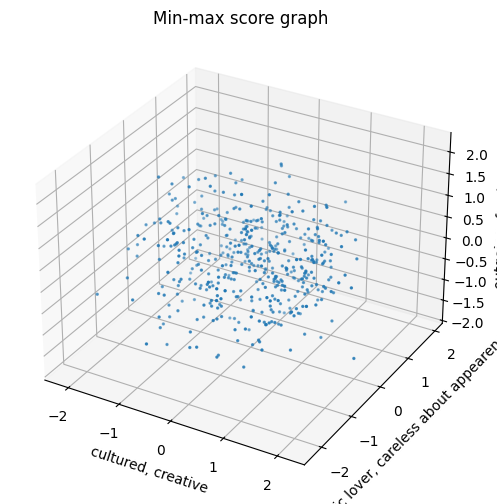

In [26]:
score_graph(Ystd_df,names_pc_std,'Std score graph')
score_graph(Ymm_df,names_pc_mm,'Min-max score graph')

We tried to plot all the score graphs, coloring the dots with respect to any label in the list _'labels'_. We found out that the only one with interesting outcomes is the one with the gender label, so here we plot it fot both datasets.

In [27]:
def score_graph_label(df, names, label, legend):
    sg_3d = plt.figure(figsize=(8,8))
    ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
    ax_sg_3d.scatter(df[:,0],df[:,1],df[:,2], s=5,c=label)
    plt.title('SCORE GRAPH')
    ax_sg_3d.set_xlabel(names[0])
    ax_sg_3d.set_ylabel(names[1])
    ax_sg_3d.set_zlabel(names[2])
    legenda = [Line2D([0], [0], color = legend[k]) for k in legend.keys()]
    ax_sg_3d.legend(legenda, [k for k in legend.keys()])
    plt.grid()
    plt.show()

In the next cell there is a function that we used to associate a color to each different instance of the label given as input.

In [28]:
def create_labels(column):
    c1 = cm.Set1.colors
    var = np.unique(column)
    diz = {elem : c1[i] for i, elem in enumerate(var)}
    return diz, column.map(diz)

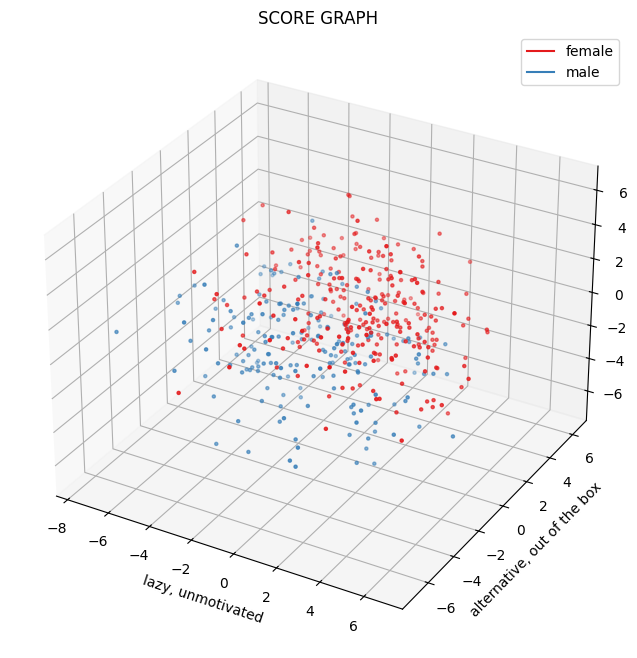

In [29]:
diz, etichette = create_labels(X_labels['Gender'])
score_graph_label(Ystd_df, names_pc_std, etichette, diz)

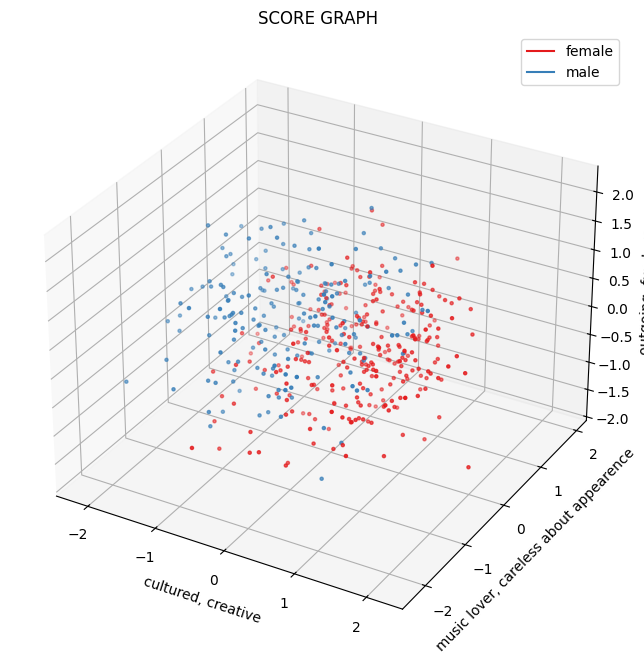

In [30]:
diz, etichette = create_labels(X_labels['Gender'])
score_graph_label(Ymm_df, names_pc_mm, etichette, diz)

As we can observe from the graphs the points are divided into two recognizable groups, despite they are not entirely separated.

## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

Here we run the k-means algorithm in order to find the best value of k based on the silhouette score, where k is the number of clusters.

In [31]:
def kmeans_alg(df):
    km_list = []
    silcoeff_list = []
    k_list = list(range(3, 11))

    for i in range(len(k_list)):
        km_list.append(KMeans(random_state=random_seed,n_clusters=k_list[i], n_init = 'auto'))
        km = km_list[i]
        km.fit(df)
        silcoeff_list.append(silhouette_score(df,km.labels_))


    i_best = np.argmax(silcoeff_list) 
    k = k_list[i_best]
    km = km_list[i_best]

    
    print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list)} --> k = {k}') 

    

    return km

In [32]:
print('Standard scaled dataset')
km_std = kmeans_alg(Ystd_df)
print('\nMin-max scaled dataset')
km_mm = kmeans_alg(Ymm_df)

Standard scaled dataset
BEST SILHOUETTE SCORE: 0.17067078512920367 --> k = 3

Min-max scaled dataset
BEST SILHOUETTE SCORE: 0.17769377991592103 --> k = 3


The result of our analysis shohs that, for both datasets, the optimal number of clusters is 3.

In the following cell, we display the scatter plot with the distinct clusters and their respective centroids.

In [33]:
def plot_clusters(df, km, names, tit):
    sg_3d = plt.figure(figsize=(8,8))
    ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
    ax_sg_3d.scatter(df[:,0],df[:,1],df[:,2], s=5,c=km.labels_, cmap = 'plasma')
    ax_sg_3d.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2], s=30, c = 'red', alpha = 1)
    plt.title(tit)
    ax_sg_3d.set_xlabel(names[0])
    ax_sg_3d.set_ylabel(names[1])
    ax_sg_3d.set_zlabel(names[2])
    plt.grid()
    plt.show()

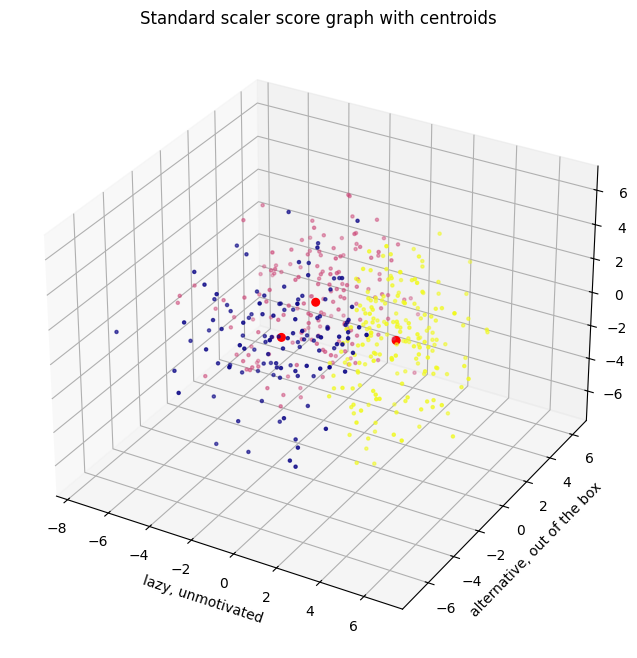

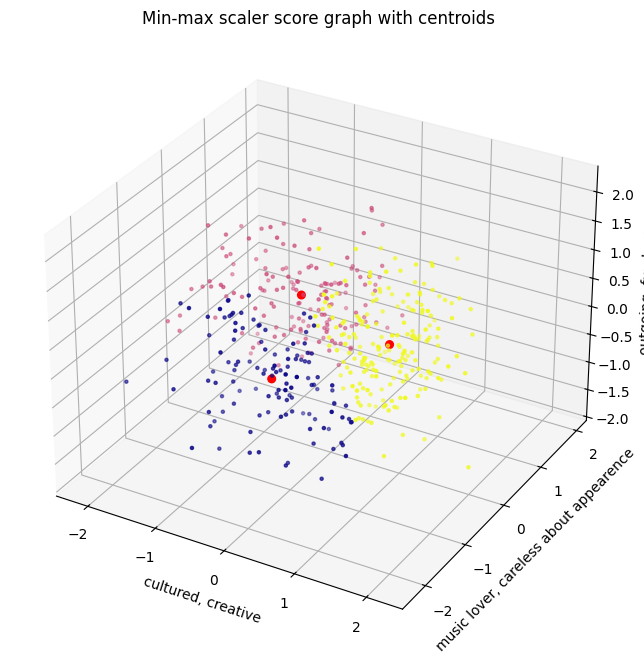

In [34]:
plot_clusters(Ystd_df,km_std, names_pc_std, 'Standard scaler score graph with centroids')
plot_clusters(Ymm_df, km_mm, names_pc_mm, 'Min-max scaler score graph with centroids')

We display in a bar plot the coordinates of each centroid in the PC space.

In [35]:
def centroids_definition(km, Y, names):
    Y_max, Y_min = Y.max(axis = 0), Y.min(axis = 0)
    fig, ax = plt.subplots(1, km.cluster_centers_.shape[0], figsize=(10, 5))
    for ii in range(km.cluster_centers_.shape[0]):
        ax[ii].bar(np.arange(km.cluster_centers_.shape[1]), Y_max, color='blue', alpha=0.15)
        ax[ii].bar(np.arange(km.cluster_centers_.shape[1]), Y_min, color='blue', alpha=0.15)
        ax[ii].bar(np.arange(km.cluster_centers_.shape[1]), km.cluster_centers_[ii, :])
        ax[ii].set_xticks(ticks=np.arange(km.cluster_centers_.shape[1]))
        ax[ii].set_xticklabels(labels=names, rotation=60)
        ax[ii].grid(visible=True, which='both')
        ax[ii].set_title(f'CENTROID {ii+1}')
        

Standard scaled


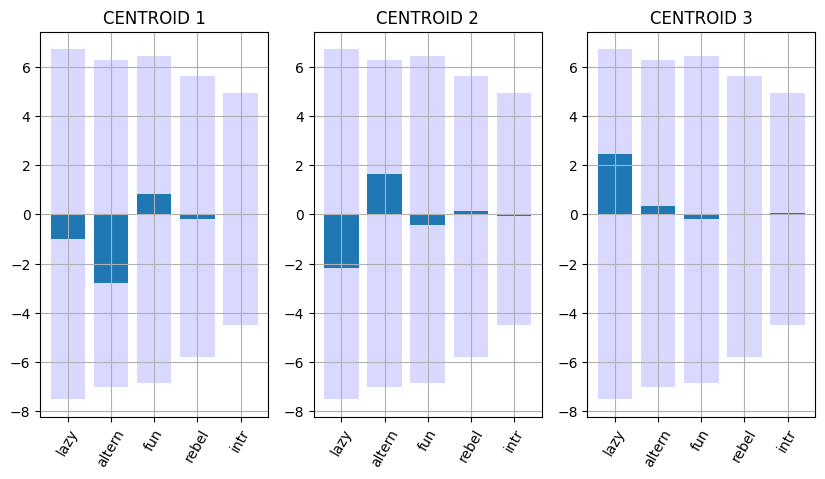

In [36]:
abbr_names_std = ['lazy', 'altern', 'fun', 'rebel', 'intr']
print('Standard scaled')
centroids_definition(km_std, Ystd_df, abbr_names_std)


**Interpretation of Centroids**

*Standard Scaler*

Centroid 1: Alternative, unstable and rebel person, lover of hard-rock and punk music, uninspired by learning and culture

Centroid 2: Lazy and mundane person, shopping lover.

Centroid 3: Motivated and culturally active person.

Min-max scaled


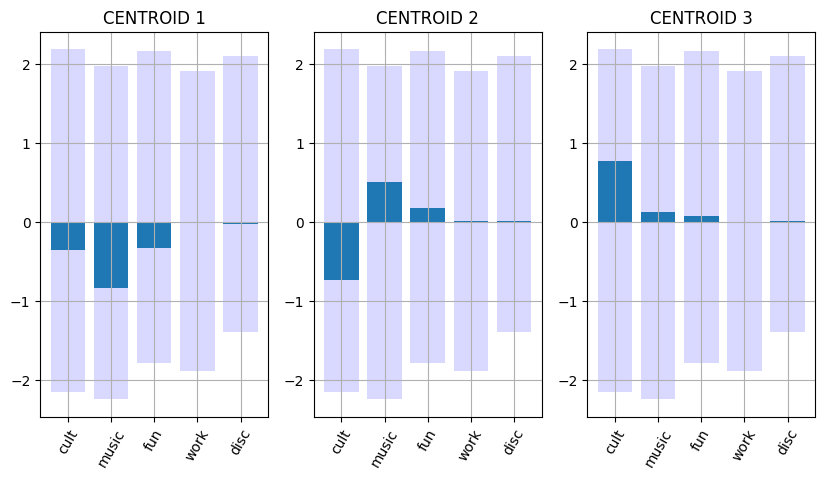

In [37]:
abbr_names_mm = ['cult', 'music', 'fun', 'work', 'disc']
print('Min-max scaled')
centroids_definition(km_mm, Ymm_df, abbr_names_mm)

**Interpretation of Centroids**

*Min-max Scaler*

Centroid 1: Inactive person, who doesn't love to spend on looks but loves music.

Centroid 2: Lazy and unstimulated person, who loves to spend on looks.

Centroid 3: Reliable, hard worker and a dedicated scholar. 

## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**. 

**External evaluation**


In [38]:
def cluster_labels_distribution(km):
    
    diz = {}
    for i in labels:
        if i not in ['Age', 'Weight', 'Height']:
            list_of_percentages = []
            for j in range(3):
                cluster_data = X_labels[km.labels_ == j]
                percentages = round(cluster_data.groupby(i).size() / len(cluster_data) * 100,1)
                list_of_percentages.append(percentages)
            
            diz[i] = list_of_percentages
    return diz

diz_std = cluster_labels_distribution(km_std)
diz_mm = cluster_labels_distribution(km_mm)

To perform an external evaluation, we decided to compute the percentage distribution of all 'Demographic' labels for each cluster created by the k-means algorithm. We noticed that, apart from the 'Gender' label, all the other labels have an almost uniform distribution (i.e. all clusters show the same distribution). This result was expected because, as observed in Exercise 3.4, the distribution of points in the PC-space graph closely resembles the same distribution in each cluster. 
All the labels (apart from 'Gender') showed a barplot similar to the following one:

In [39]:
def bar_evaluation(percentages):
    fig, ax = plt.subplots(1,3, figsize=(10, 5))
    colors = cm.Set1(np.linspace(0,len(percentages)*10))
    for i in range(3):
        indices = percentages[i].index.values
        ax[i].bar(np.arange(len(percentages[i])), percentages[i], color = colors)
        ax[i].set_title(f'Cluster {i + 1}')
        ax[i].set_xticks(np.arange(len(indices)))
        ax[i].set_xticklabels(indices, rotation=45) 
        ax[i].set_ylim([0, 110])

Standard scaled


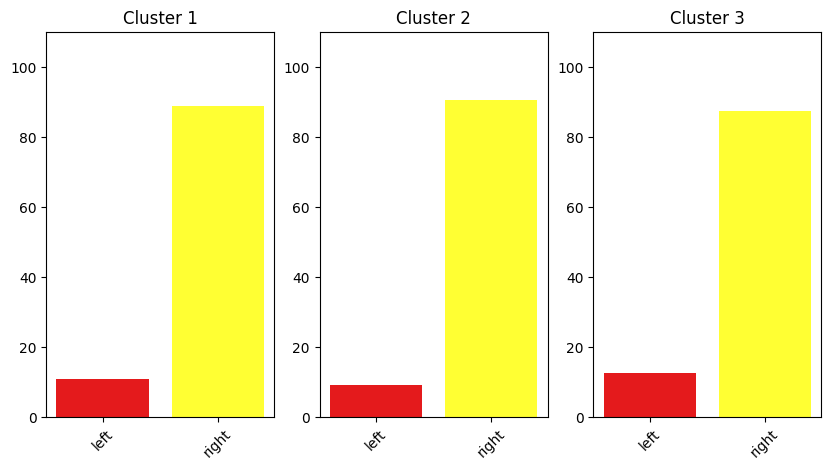

In [40]:
print('Standard scaled')
bar_evaluation(diz_std['Hand'])

Min-max scaled


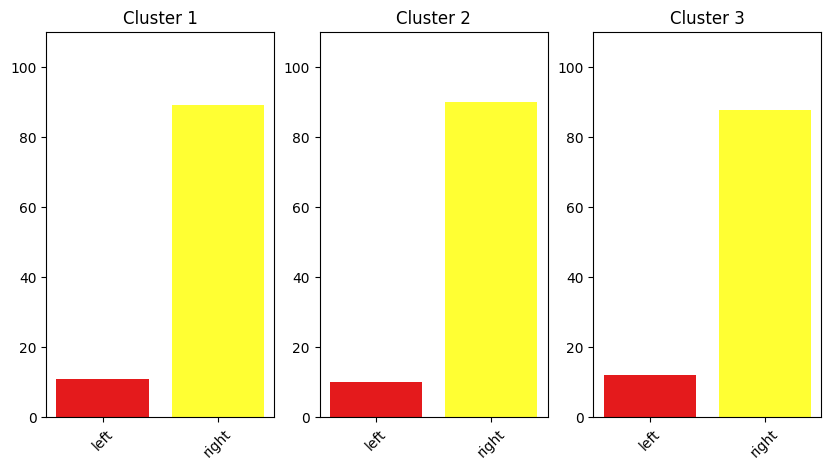

In [41]:
print('Min-max scaled')
bar_evaluation(diz_mm['Hand'])


The 'Gender' label is slightly more interesting because the points show different distributions between clusters. In particular, while the first two display an almost uniform distribution not allowing us to gain more information from it, the third one has a significative majority of females, so we concluded that women more motivated and culturally active then men.

Standard scaled


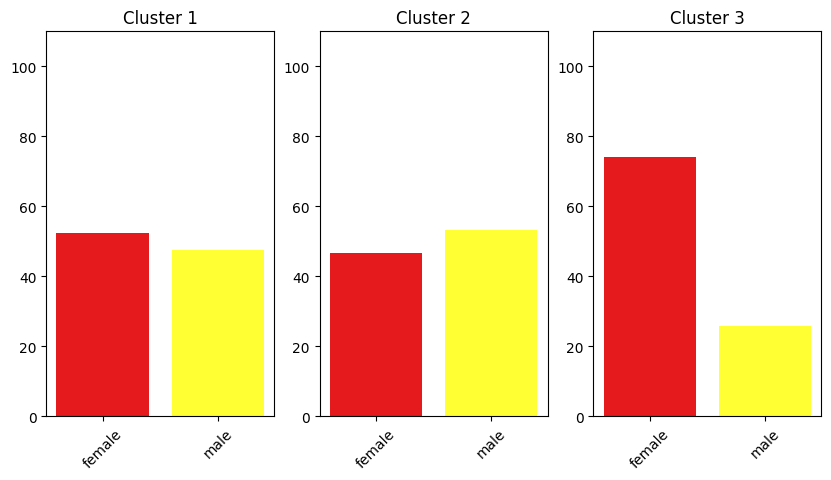

In [42]:
print('Standard scaled')
bar_evaluation(diz_std['Gender'])

Min-max scaled


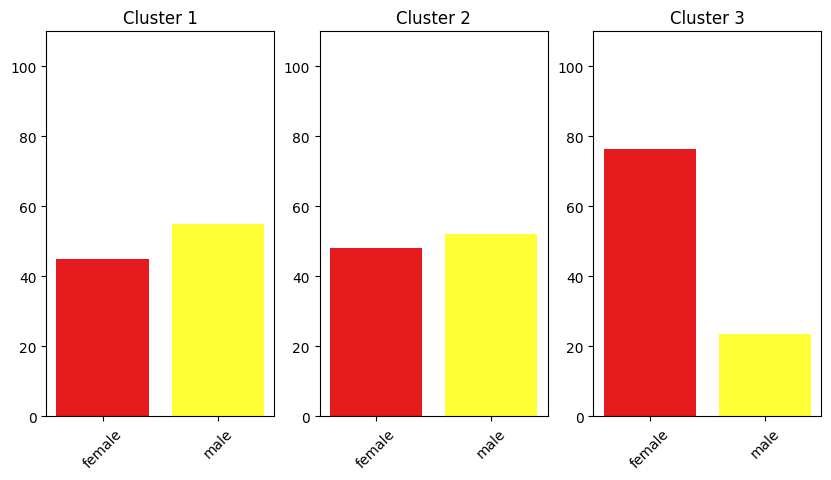

In [43]:
print('Min-max scaled')
bar_evaluation(diz_mm['Gender'])

**Internal evaluation**

In [44]:
sil_std = silhouette_score(Ystd_df, km_std.labels_)
sil_mm = silhouette_score(Ymm_df, km_mm.labels_)

print(f'Silhouette score for the standard scaled dataset: {sil_std}')
print(f'\nSilhouette score for the min-max scaled dataset: {sil_mm}')

Silhouette score for the standard scaled dataset: 0.17067078512920367

Silhouette score for the min-max scaled dataset: 0.17769377991592103


To perform the internal evaluation we based our analysis on the silhouette score metric. We recomputed it and we noticed that the results for the two scaled datasets are almost identical, this is due to the resemblance between their values as we already observed in the previous exercises. 

In addition, the result we obtained is more or less 0.17, which is a low one. We think that this outcome can be explained looking at the data distribution in the score graph: since our data have have irregular shape and there are not appreciably separate groups the k-means algorithm cannot perform well.



